In [19]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap7
/Users/jinceyang/Desktop/codebase/ml/learn_d2l already in Python path


In [20]:
import importlib
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import numpy as np

import importlib
from d2l.classification.model import MLPClassifierDropout, MLPClassifierDropoutTorch
from d2l.classification.dataset import FashionMNISTDataset
from d2l.base.trainer import Trainer
from d2l.base.evaluator import ClassificationEvaluator
from d2l.base.optimizer import SGDOptimizer
from d2l.base.plot import plot_loss, show_images, plot_losses
from d2l.base.utils import mps
from typing import List
from matplotlib import pyplot as plt
import torch
import numpy as np

from d2l.base.function import corr2d, corr2d_multi_in, corr2d_multi_in_out, corr2d_multi_in_out_1x1, comp_conv2d, max_pool2d, avg_pool2d

In [21]:
rng = torch.Generator().manual_seed(42)

In [22]:
data = FashionMNISTDataset()
train_data_loader = data.get_train_dataloader(batch_size=10)
train_iter = iter(train_data_loader)
X, y = next(train_iter)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: torch.Size([10, 1, 28, 28])
y shape: torch.Size([10])


In [23]:
from d2l import LeNetClassifierTorch

lenet = LeNetClassifierTorch(
    num_features=(1, 28, 28),
    num_outputs=10,
    rng=rng
)

lenet.init((10, 1, 28, 28))
lenet.layer_summary((10, 1, 28, 28))

              Conv2d  input shape: torch.Size([10, 1, 28, 28])
              Conv2d  output shape: torch.Size([10, 6, 28, 28])
             Sigmoid  input shape: torch.Size([10, 6, 28, 28])
             Sigmoid  output shape: torch.Size([10, 6, 28, 28])
           AvgPool2d  input shape: torch.Size([10, 6, 28, 28])
           AvgPool2d  output shape: torch.Size([10, 6, 14, 14])
              Conv2d  input shape: torch.Size([10, 6, 14, 14])
              Conv2d  output shape: torch.Size([10, 16, 10, 10])
             Sigmoid  input shape: torch.Size([10, 16, 10, 10])
             Sigmoid  output shape: torch.Size([10, 16, 10, 10])
           AvgPool2d  input shape: torch.Size([10, 16, 10, 10])
           AvgPool2d  output shape: torch.Size([10, 16, 5, 5])
             Flatten  input shape: torch.Size([10, 16, 5, 5])
             Flatten  output shape: torch.Size([10, 400])
              Linear  input shape: torch.Size([10, 400])
              Linear  output shape: torch.Size([10, 120])


In [24]:
def eval_on_epoch(model, epoch_id, batch_losses):
    evaluator = ClassificationEvaluator(model)
    loss = evaluator.loss(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation loss {loss:.4f}')
    accuracy = evaluator.accuracy(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation accuracy {accuracy:.4f}')

In [25]:
trainer = Trainer(
    model=lenet, 
    optimizer=torch.optim.Adam(lenet.net.parameters(), lr=0.001),
    on_train_epoch_end=eval_on_epoch
)

Epoch 0, validation loss 1.0453
Epoch 0, validation accuracy 0.6431
Epoch 1, validation loss 0.7676
Epoch 1, validation accuracy 0.7163
Epoch 2, validation loss 0.6718
Epoch 2, validation accuracy 0.7439
Epoch 3, validation loss 0.6222
Epoch 3, validation accuracy 0.7628
Epoch 4, validation loss 0.5778
Epoch 4, validation accuracy 0.7840
Epoch 5, validation loss 0.5485
Epoch 5, validation accuracy 0.7898
Epoch 6, validation loss 0.5257
Epoch 6, validation accuracy 0.8029
Epoch 7, validation loss 0.5025
Epoch 7, validation accuracy 0.8118
Epoch 8, validation loss 0.4983
Epoch 8, validation accuracy 0.8123
Epoch 9, validation loss 0.4700
Epoch 9, validation accuracy 0.8276
Epoch 10, validation loss 0.4640
Epoch 10, validation accuracy 0.8288
Epoch 11, validation loss 0.4487
Epoch 11, validation accuracy 0.8339
Epoch 12, validation loss 0.4419
Epoch 12, validation accuracy 0.8386
Epoch 13, validation loss 0.4456
Epoch 13, validation accuracy 0.8372
Epoch 14, validation loss 0.4230
Epoch 1

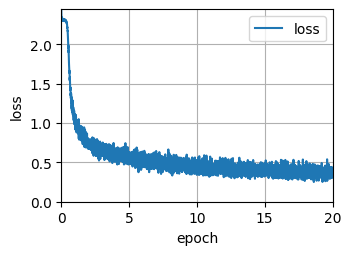

In [26]:
epoch_losses = trainer.train(
    data.get_train_dataloader_epochs(batch_size=256, num_epochs=20)
)
fig, ax = plt.subplots()
plot_loss(ax, epoch_losses)

In [27]:
evaluator = ClassificationEvaluator(lenet)
test_loss = evaluator.loss(data.get_test_dataloader(data.test_size))
print(f'Test loss: {test_loss:.4f}')
accuracy = evaluator.accuracy(data.get_test_dataloader(data.test_size))
print(f'Test accuracy: {accuracy:.2%}')

Test loss: 0.3992
Test accuracy: 85.42%
